## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading initial dataset

In [2]:
data=pd.read_csv('./data/EY007.20240608T200610.csv')
data

,Statistic Label,Sex,Age Last Birthday,At Each Year of Age,CensusYear,UNIT,VALUE
0,Population 2011 to 2016,Male,Under 1 year,Population,2016,Number,31876
1,Population 2011 to 2016,Male,1 year,Population,2016,Number,32824
2,Population 2011 to 2016,Male,2 years,Population,2016,Number,34031
3,Population 2011 to 2016,Male,3 years,Population,2016,Number,34785
4,Population 2011 to 2016,Male,4 years,Population,2016,Number,36215
...,...,...,...,...,...,...,...
197,Population 2011 to 2016,Female,96 years,Population,2016,Number,889
198,Population 2011 to 2016,Female,97 years,Population,2016,Number,542
199,Population 2011 to 2016,Female,98 years,Population,2016,Number,357
200,Population 2011 to 2016,Female,99 years,Population,2016,Number,244


In [3]:
# Drop unnecessary columns
data = data.drop(columns=['Statistic Label', 'At Each Year of Age', 'CensusYear', 'UNIT'])
data

,Sex,Age Last Birthday,VALUE
0,Male,Under 1 year,31876
1,Male,1 year,32824
2,Male,2 years,34031
3,Male,3 years,34785
4,Male,4 years,36215
...,...,...,...
197,Female,96 years,889
198,Female,97 years,542
199,Female,98 years,357
200,Female,99 years,244


In [4]:
# Extract data for males and females
male_data = data[data['Sex'] == 'Male']
female_data = data[data['Sex'] == 'Female']

In [5]:
# Extract numeric values from 'Age Last Birthday' column
male_data['Age'] = male_data['Age Last Birthday'].str.extract('(\d+)').astype(float)
female_data['Age'] = female_data['Age Last Birthday'].str.extract('(\d+)').astype(float)

C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\4277988067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Age'] = male_data['Age Last Birthday'].str.extract('(\d+)').astype(float)
C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\4277988067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Age'] = female_data['Age Last Birthday'].str.extract('(\d+)').astype(float)


## Population distribution for males and females for the year 2016

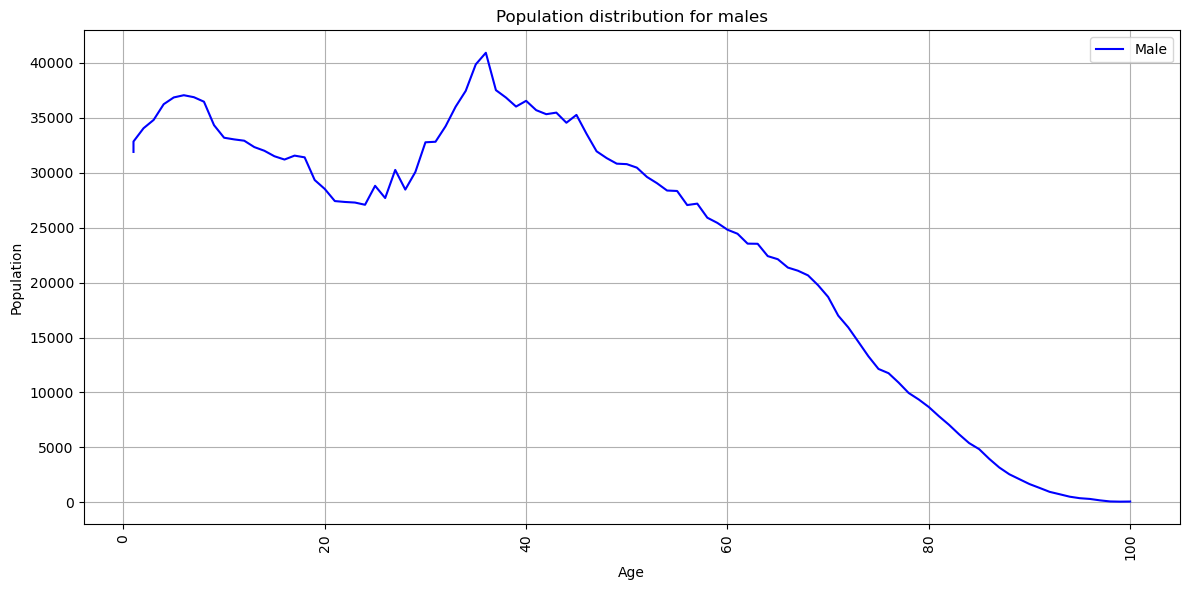

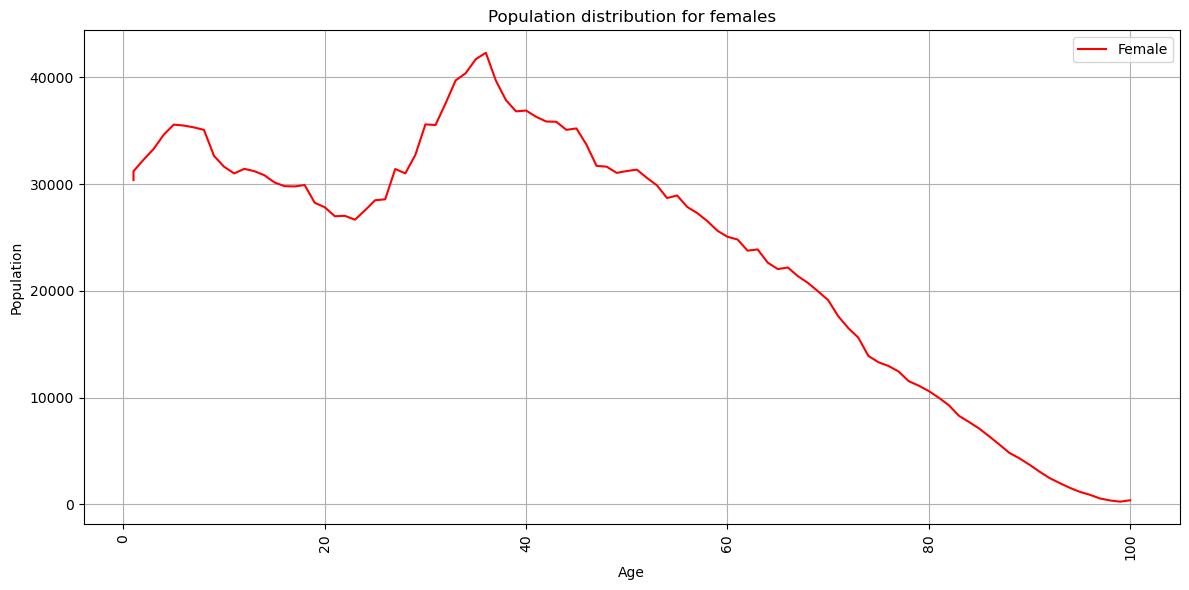

In [6]:
# Plot population data for males
plt.figure(figsize=(12, 6))
plt.plot(male_data['Age'], male_data['VALUE'], label='Male', color='blue')
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Population distribution for males')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot population data for females
plt.figure(figsize=(12, 6))
plt.plot(female_data['Age'], female_data['VALUE'], label='Female', color='red')
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Population distribution for females')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Projecting population for 2017 to 2023 using data for the year 2016

In [7]:
# Convert 'Age Last Birthday' to numeric values
def age_mapping(age):
    if 'Under' in age:
        return 0
    else:
        return int(age.split()[0])  # extract the number before 'year' or 'years'

# Apply the mapping function to 'Age Last Birthday' for both male and female datasets
male_data['age'] = male_data['Age Last Birthday'].apply(age_mapping)
female_data['age'] = female_data['Age Last Birthday'].apply(age_mapping)

# Now, proceed with projections and ensure the output has 'age' as the column name
# Initialize projections for 2016 to 2023
num_years = 8  # 2016 to 2023
male_projection = pd.DataFrame(0, index=male_data['age'], columns=range(2016, 2016 + num_years))
female_projection = pd.DataFrame(0, index=female_data['age'], columns=range(2016, 2016 + num_years))

# Set the 2016 population as the starting point
male_projection[2016] = male_data['VALUE'].values
female_projection[2016] = female_data['VALUE'].values

# Fill in the projections for each year
for i in range(1, num_years):
    male_projection.iloc[1:, i] = male_projection.iloc[:-1, i-1].values
    female_projection.iloc[1:, i] = female_projection.iloc[:-1, i-1].values
    male_projection.iloc[0, i] = 0
    female_projection.iloc[0, i] = 0


# Adjust the column names to be 'Population 2016', 'Population 2017', etc.
male_projection.columns = [f'Population {year}' for year in male_projection.columns]
female_projection.columns = [f'Population {year}' for year in female_projection.columns]

# Save the projections to CSV files with 'age' as the index column
male_projection.to_csv('male_population_projection_2016_2023.csv', index_label='Age')
female_projection.to_csv('female_population_projection_2016_2023.csv', index_label='Age')


C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\2500882309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['age'] = male_data['Age Last Birthday'].apply(age_mapping)
C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\2500882309.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age'] = female_data['Age Last Birthday'].apply(age_mapping)


## Plotting the above projections for visualisation

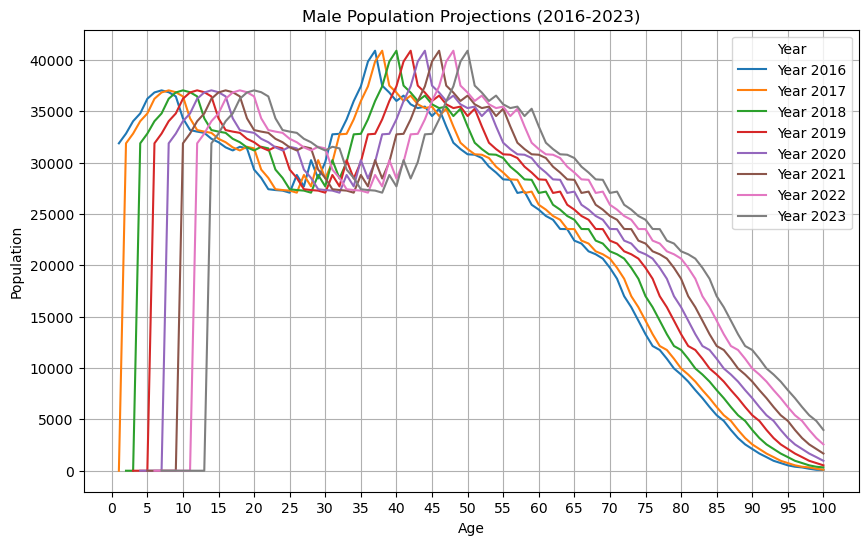

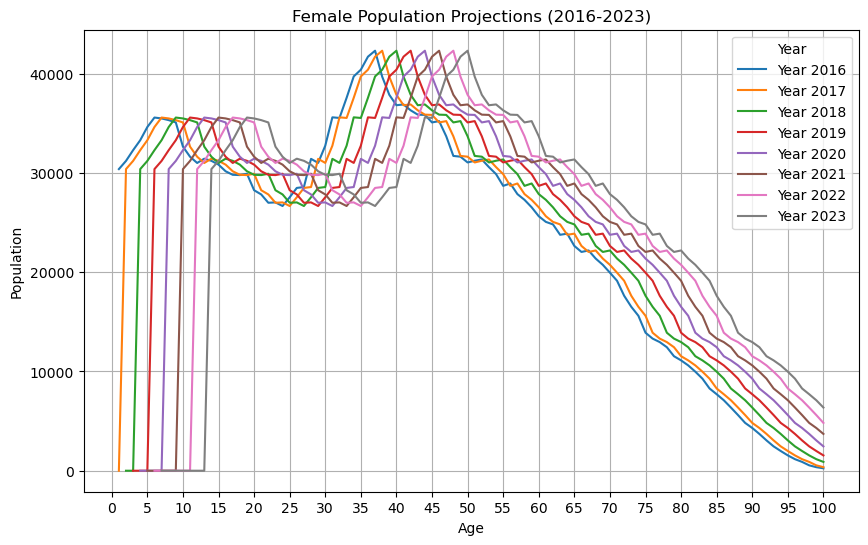

In [8]:
# Extract the years from the male and female dataframes
years = [int(col.split()[-1]) for col in male_projection.columns]  # Extract years from 'Population XXXX'

# Plot for Male Population
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
for i, year in enumerate(years):
    age_offset = max(0, i - 1)  # Determine the age offset for projections
    plt.plot(male_projection.index[1 + age_offset:], male_projection[f'Population {year}'][:-age_offset - 1], label=f'Year {year}')
plt.title('Male Population Projections (2016-2023)')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.xticks(np.arange(0, 101, 5))  # Set x-axis ticks every 5 years
plt.grid(True)
plt.show()

# Plot for Female Population
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
for i, year in enumerate(years):
    age_offset = max(0, i - 1)  # Determine the age offset
    plt.plot(female_projection.index[1 + age_offset:], female_projection[f'Population {year}'][:-age_offset - 1], label=f'Year {year}')
plt.title('Female Population Projections (2016-2023)')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.xticks(np.arange(0, 101, 5))  # Set x-axis ticks every 5 years
plt.grid(True)
plt.show()


## Consider death rate for different age groups

We consider death rate for different age group. For which, we select another relevant data set from the CSO website.

In [9]:
# Load the CSV file into a DataFrame
death_df=pd.read_csv('./data/VSA07.20240623T140601.csv')
death_df

,STATISTIC Label,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
0,Deaths Occurring,2016,State,Male,Under 1 year,Number,109
1,Deaths Occurring,2016,State,Male,1 - 4 years,Number,18
2,Deaths Occurring,2016,State,Male,5 - 9 years,Number,4
3,Deaths Occurring,2016,State,Male,10 - 14 years,Number,18
4,Deaths Occurring,2016,State,Male,15 - 19 years,Number,55
5,Deaths Occurring,2016,State,Male,20 - 24 years,Number,83
6,Deaths Occurring,2016,State,Male,25 - 29 years,Number,93
7,Deaths Occurring,2016,State,Male,30 - 34 years,Number,118
8,Deaths Occurring,2016,State,Male,35 - 39 years,Number,177
9,Deaths Occurring,2016,State,Male,40 - 44 years,Number,242


We remove unnecessary columns. 

In [10]:
# Drop unnecessary columns
death_df = death_df.drop(columns=['STATISTIC Label', 'Year', 'Area of Residence', 'UNIT'])
death_df

,Sex,Age at Death,VALUE
0,Male,Under 1 year,109
1,Male,1 - 4 years,18
2,Male,5 - 9 years,4
3,Male,10 - 14 years,18
4,Male,15 - 19 years,55
5,Male,20 - 24 years,83
6,Male,25 - 29 years,93
7,Male,30 - 34 years,118
8,Male,35 - 39 years,177
9,Male,40 - 44 years,242


Finding the total number of death for each age group. This is done sepeartely for male and female.

In the preliminary data we have (population data), we are grouping the values based on age group inorder to include the death rate with population.

## Create mapping for age groups

In [11]:
age_group_mapping = {
    "Under 1 year": ['Under 1 year'],
    "1 - 4 years": ['1 year', '2 years', '3 years', '4 years'],
    "5 - 9 years": ['5 years', '6 years', '7 years', '8 years', '9 years'],
    "10 - 14 years": ['10 years', '11 years', '12 years', '13 years', '14 years'],
    "15 - 19 years": ['15 years', '16 years', '17 years', '18 years', '19 years'],
    "20 - 24 years": ['20 years', '21 years', '22 years', '23 years', '24 years'],
    "25 - 29 years": ['25 years', '26 years', '27 years', '28 years', '29 years'],
    "30 - 34 years": ['30 years', '31 years', '32 years', '33 years', '34 years'],
    "35 - 39 years": ['35 years', '36 years', '37 years', '38 years', '39 years'],
    "40 - 44 years": ['40 years', '41 years', '42 years', '43 years', '44 years'],
    "45 - 49 years": ['45 years', '46 years', '47 years', '48 years', '49 years'],
    "50 - 54 years": ['50 years', '51 years', '52 years', '53 years', '54 years'],
    "55 - 59 years": ['55 years', '56 years', '57 years', '58 years', '59 years'],
    "60 - 64 years": ['60 years', '61 years', '62 years', '63 years', '64 years'],
    "65 - 69 years": ['65 years', '66 years', '67 years', '68 years', '69 years'],
    "70 - 74 years": ['70 years', '71 years', '72 years', '73 years', '74 years'],
    "75 - 79 years": ['75 years', '76 years', '77 years', '78 years', '79 years'],
    "80 - 84 years": ['80 years', '81 years', '82 years', '83 years', '84 years'],
    "85 years and over": ['85 years', '86 years', '87 years', '88 years', '89 years', '90 years', '91 years', '92 years', '93 years', '94 years', '95 years', '96 years', '97 years', '98 years', '99 years']
}

## Sum population data by age groups

In [12]:
# Create a DataFrame to hold the aggregated values
aggregated_data = []

# Iterate through the age group mapping
for age_group, ages in age_group_mapping.items():
    # Filter the population data for the current age group
    for sex in ['Male', 'Female']:
        age_group_population = data[
            (data['Sex'] == sex) &
            (data['Age Last Birthday'].isin(ages))
        ]['VALUE'].sum()
        
        # Append the aggregated data
        aggregated_data.append({
            'Sex': sex,
            'Age Group': age_group,
            'Population': age_group_population
        })

# Convert the aggregated data to a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Define the order for the Age Groups
age_group_order = list(age_group_mapping.keys())

# Sort the DataFrame by 'Sex' and 'Age Group' according to the defined order
# Custom sort for 'Sex' with 'Male' on top
aggregated_df['Sex'] = pd.Categorical(aggregated_df['Sex'], categories=['Male', 'Female'], ordered=True)
aggregated_df['Age Group'] = pd.Categorical(aggregated_df['Age Group'], categories=age_group_order, ordered=True)
aggregated_df = aggregated_df.sort_values(by=['Sex', 'Age Group'], ascending=[True, True])

# Display the aggregated DataFrame
print(aggregated_df)

       Sex          Age Group  Population
0     Male       Under 1 year       31876
2     Male        1 - 4 years      137855
4     Male        5 - 9 years      181470
6     Male      10 - 14 years      163378
8     Male      15 - 19 years      154908
10    Male      20 - 24 years      137584
12    Male      25 - 29 years      145222
14    Male      30 - 34 years      173179
16    Male      35 - 39 years      191045
18    Male      40 - 44 years      177482
20    Male      45 - 49 years      162824
22    Male      50 - 54 years      148212
24    Male      55 - 59 years      133858
26    Male      60 - 64 years      118698
28    Male      65 - 69 years      104961
30    Male      70 - 74 years       79501
32    Male      75 - 79 years       54117
34    Male      80 - 84 years       35196
36    Male  85 years and over       22978
1   Female       Under 1 year       30381
3   Female        1 - 4 years      131403
5   Female        5 - 9 years      174091
7   Female      10 - 14 years     

In [13]:
# Save the aggregated DataFrame to CSV file 
aggregated_df.to_csv('aggregated_population_data.csv', index=False)

The aggregated data is downloaded. Now, we change the column name in death data as shown below. 

We have the population data (aggregated_population_df) and death data (death_df). Now we will check if the age group column and sex column are identical in both the files.

In [14]:
death_df = death_df.rename(columns={'Age at Death': 'Age Group','VALUE': 'Population'})

## Merge and adjust population data

In [15]:
# Merge aggregated_df and death_data on 'Sex' and 'Age Group'
merged_df = pd.merge(aggregated_df, death_df, on=['Sex', 'Age Group'], suffixes=('_population', '_death'))

# Calculate Death Ratio correctly
merged_df['Death Ratio'] = merged_df['Population_death'] / merged_df['Population_population']

# Save the merged and updated DataFrame to a CSV file 
merged_df.to_csv('merged_population_data_with_death_ratio.csv', index=False)

## Death rate versus age group for male and female

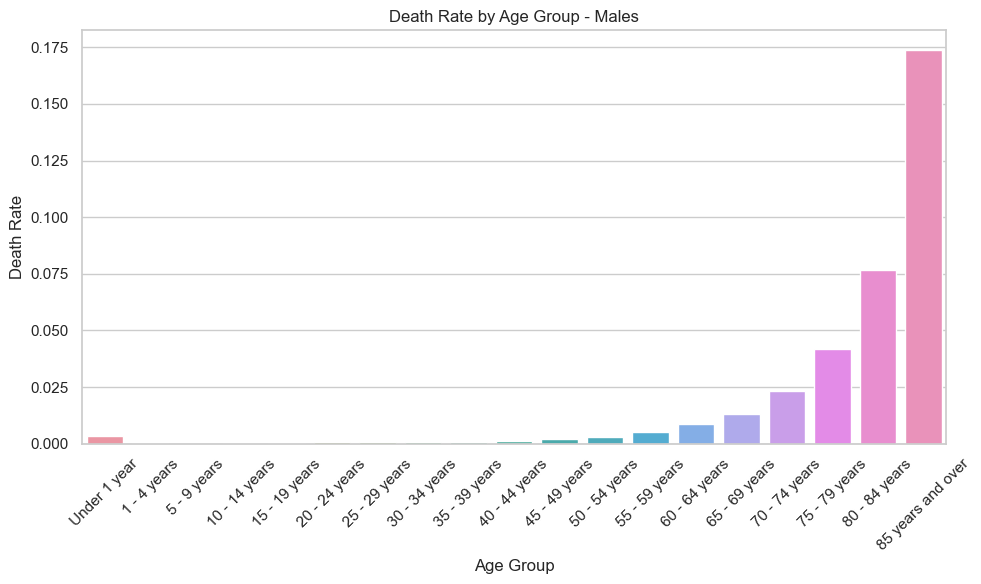

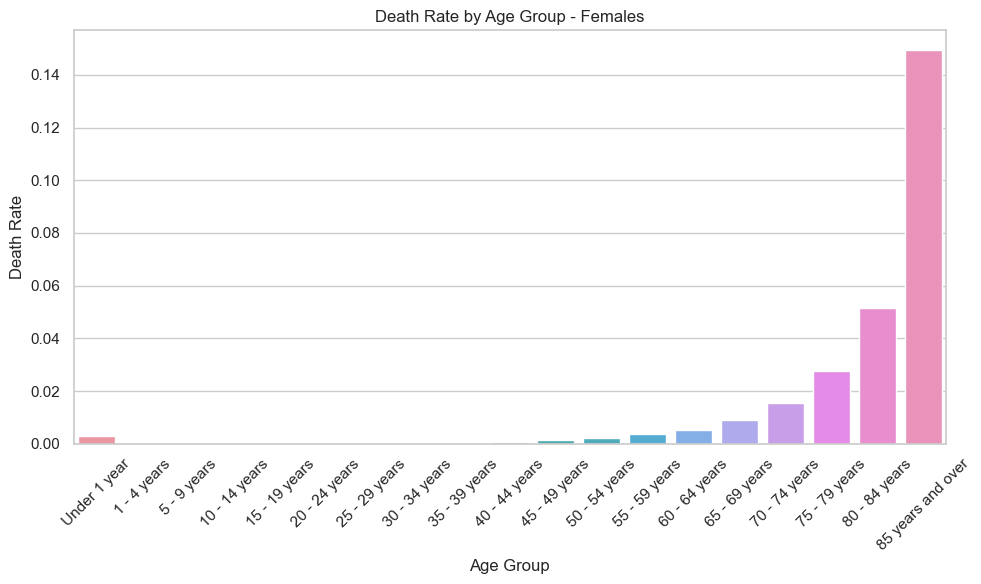

In [16]:
# Ensure 'Age Group' is categorical for correct ordering in plots
merged_df['Age Group'] = pd.Categorical(merged_df['Age Group'], categories=merged_df['Age Group'].unique(), ordered=True)

# Plotting using seaborn for better visualization (optional)
sns.set(style="whitegrid")  # Set plotting style

# Plot for Males
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Death Ratio', data=merged_df[merged_df['Sex'] == 'Male'])
plt.title('Death Rate by Age Group - Males')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Females
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Death Ratio', data=merged_df[merged_df['Sex'] == 'Female'])
plt.title('Death Rate by Age Group - Females')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Define the mapping for age groups
age_group_mapping = {
    "Under 1 year": ["0"],
    "1 - 4 years": ["1", "2", "3", "4"],
    "5 - 9 years": ["5", "6", "7", "8", "9"],
    "10 - 14 years": ["10", "11", "12", "13", "14"],
    "15 - 19 years": ["15", "16", "17", "18", "19"],
    "20 - 24 years": ["20", "21", "22", "23", "24"],
    "25 - 29 years": ["25", "26", "27", "28", "29"],
    "30 - 34 years": ["30", "31", "32", "33", "34"],
    "35 - 39 years": ["35", "36", "37", "38", "39"],
    "40 - 44 years": ["40", "41", "42", "43", "44"],
    "45 - 49 years": ["45", "46", "47", "48", "49"],
    "50 - 54 years": ["50", "51", "52", "53", "54"],
    "55 - 59 years": ["55", "56", "57", "58", "59"],
    "60 - 64 years": ["60", "61", "62", "63", "64"],
    "65 - 69 years": ["65", "66", "67", "68", "69"],
    "70 - 74 years": ["70", "71", "72", "73", "74"],
    "75 - 79 years": ["75", "76", "77", "78", "79"],
    "80 - 84 years": ["80", "81", "82", "83", "84"],
    "85 years and over": [str(age) for age in range(85, 100)] + ['100 years & over']

}

# Initialize an empty list to hold the expanded rows
expanded_rows = []

# Iterate through the DataFrame and expand the age groups
for _, row in merged_df.iterrows():
    age_group = row["Age Group"]
    if age_group in age_group_mapping:
        expanded_ages = age_group_mapping[age_group]
        for age in expanded_ages:
            new_row = row.copy()
            new_row["Age Group"] = age
            expanded_rows.append(new_row)

# Create a new DataFrame with the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Save the expanded DataFrame to a new CSV file
expanded_df.to_csv('expanded_data_with_death_ratio.csv', index=False)

# Display the first few rows of the expanded DataFrame
expanded_df.head()

,Sex,Age Group,Population_population,Population_death,Death Ratio
0,Male,0,31876,109,0.003420
1,Male,1,137855,18,0.000131
1,Male,2,137855,18,0.000131
1,Male,3,137855,18,0.000131
1,Male,4,137855,18,0.000131


Now we have the initial population of 2016 and the death ratio for each age group. We consider this death ratio and find the projections for next 6 years. This is shown below.

In [18]:
# Separate death rates for males and females
male_death_rates = merged_df[merged_df['Sex'] == 'Male'][['Age Group', 'Death Ratio']].set_index('Age Group')
female_death_rates = merged_df[merged_df['Sex'] == 'Female'][['Age Group', 'Death Ratio']].set_index('Age Group')

# Define a function to expand the age group death rates to single years
def expand_age_groups(death_rates):
    age_group_mapping = {
        "Under 1 year": ["0"],
        "1 - 4 years": ["1", "2", "3", "4"],
        "5 - 9 years": ["5", "6", "7", "8", "9"],
        "10 - 14 years": ["10", "11", "12", "13", "14"],
        "15 - 19 years": ["15", "16", "17", "18", "19"],
        "20 - 24 years": ["20", "21", "22", "23", "24"],
        "25 - 29 years": ["25", "26", "27", "28", "29"],
        "30 - 34 years": ["30", "31", "32", "33", "34"],
        "35 - 39 years": ["35", "36", "37", "38", "39"],
        "40 - 44 years": ["40", "41", "42", "43", "44"],
        "45 - 49 years": ["45", "46", "47", "48", "49"],
        "50 - 54 years": ["50", "51", "52", "53", "54"],
        "55 - 59 years": ["55", "56", "57", "58", "59"],
        "60 - 64 years": ["60", "61", "62", "63", "64"],
        "65 - 69 years": ["65", "66", "67", "68", "69"],
        "70 - 74 years": ["70", "71", "72", "73", "74"],
        "75 - 79 years": ["75", "76", "77", "78", "79"],
        "80 - 84 years": ["80", "81", "82", "83", "84"],
        "85 years and over": [str(age) for age in range(85, 100)] + ['100']  # Treat '100 years & over' as 100
    }

    expanded_death_rates = []
    for age_group, ages in age_group_mapping.items():
        if age_group in death_rates.index:
            for age in ages:
                expanded_death_rates.append((age, death_rates.loc[age_group, 'Death Ratio']))
    
    # Convert the 'age' column to integer where possible
    expanded_df = pd.DataFrame(expanded_death_rates, columns=['Age', 'Death Ratio'])
    expanded_df['Age'] = expanded_df['Age'].apply(lambda x: int(x) if x != '100' else 100)
    
    # Sort by age
    expanded_df = expanded_df.sort_values(by='Age').set_index('Age')
    
    return expanded_df

# Expand the death rates to single years
male_death_rates_expanded = expand_age_groups(male_death_rates)
female_death_rates_expanded = expand_age_groups(female_death_rates)

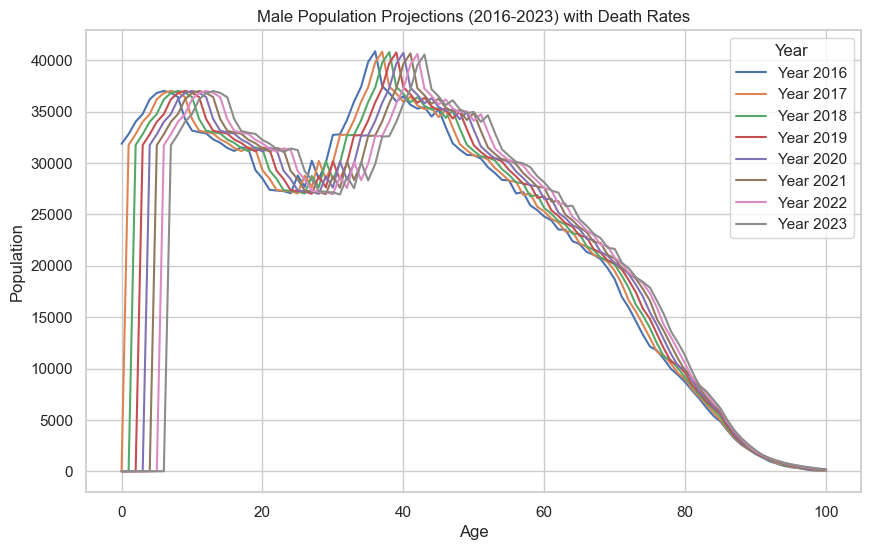

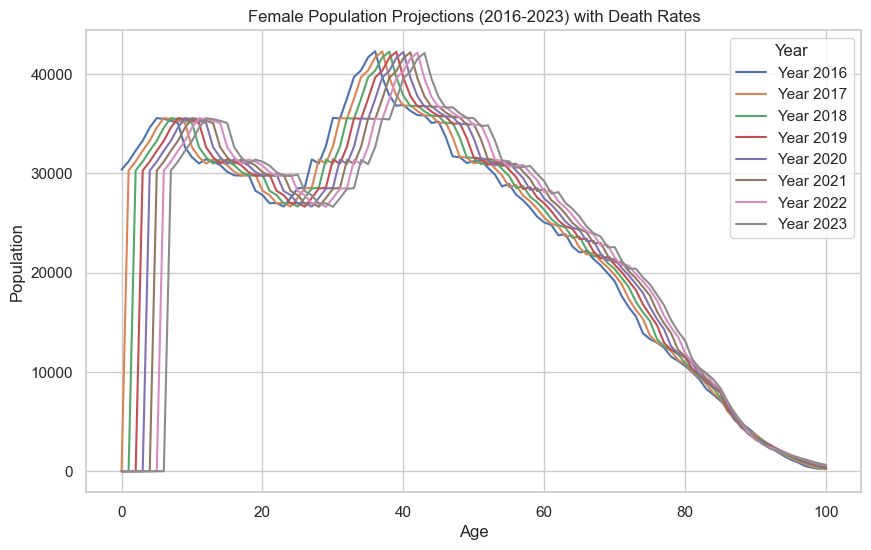

In [19]:
# Define the number of years (2016 to 2023)
num_years = 8

# Reinitialize male and female projection DataFrames based on previous definitions
male_projection = pd.DataFrame(0, index=male_data['age'], columns=range(2016, 2016 + num_years))
female_projection = pd.DataFrame(0, index=female_data['age'], columns=range(2016, 2016 + num_years))

# Set the 2016 population as the starting point
male_projection[2016] = male_data['VALUE'].values
female_projection[2016] = female_data['VALUE'].values

# Fill in the projections for each year considering death rates from the dataset
for i in range(1, num_years):
    male_projection.iloc[1:, i] = male_projection.iloc[:-1, i-1] * (1 - male_death_rates_expanded['Death Ratio'].values[:100])
    female_projection.iloc[1:, i] = female_projection.iloc[:-1, i-1] * (1 - female_death_rates_expanded['Death Ratio'].values[:100])
    # Set the new births (age 0) to zero for each year
    male_projection.iloc[0, i] = 0
    female_projection.iloc[0, i] = 0

# Round the projections to whole numbers
male_projection = np.round(male_projection).astype(int)
female_projection = np.round(female_projection).astype(int)

# Save the projections to CSV files
male_projection.to_csv('male_population_projection_with_death_rates_2016_2023.csv', index_label='Age')
female_projection.to_csv('female_population_projection_with_death_rates_2016_2023.csv', index_label='Age')

# Visualization for Male Population Projections
plt.figure(figsize=(10, 6))
for year in range(2016, 2016 + num_years):
    plt.plot(male_projection.index, male_projection[year], label=f'Year {year}')
plt.title('Male Population Projections (2016-2023) with Death Rates')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Visualization for Female Population Projections
plt.figure(figsize=(10, 6))
for year in range(2016, 2016 + num_years):
    plt.plot(female_projection.index, female_projection[year], label=f'Year {year}')
plt.title('Female Population Projections (2016-2023) with Death Rates')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.grid(True)
plt.show()

## Consider birth rate for different age groups

For considering the birth rate, we take P-VSAR2016_TBL_2.12 from CSO website. A summary of the data is created and women of age group 16 give birth to children. The maximum age for maternity data given in CSO website is 45 years and above. In our analysis, we assume this as 45-50 years. In other words, we assume that women aged above 50 do not give birth. 

So, we have age of mother from 1-100, the newborns which will be 0 for women age less than 16 and greater than 50. For age group of women between 16-50, the calculation is done as follows. 

Consider first age group of mother 16-19 years for year 2016. The female population for this year of ages 16-19 are found out from initial population data. The no: of births of that age group is divided by the no: female of that particular age group. This value will give the probability of new born for that female age group. That probability is multiplied by the corresponding female population to give the number of birth.

So we calculated that in 2017, there were 63817 new borns. We assume it as 1:1 ratio for male and female. Therefore, there will be 31908 male and 31909 females. Now, the infant mortality rate for male and female are 0.003419501 and 0.002797801 respectively (From merged_population_data_with_death_ratio file).

Now, (1-infant mortality rate).(New born)= Actual no: of new born.

The actual new born in 2017 was found as 31799 male and 31820 female. 

The new born for 2017 is added to the population data. Similarly, the case is expanded for years till 2023. In all cases, the infant mortality rate values are fixed as constant.

In [20]:
# Load the previously saved male and female population projections with death rates
df_male= pd.read_csv('male_population_projection_with_death_rates_2016_2023.csv')
df_female = pd.read_csv('female_population_projection_with_death_rates_2016_2023.csv')

# Define male and female infant mortality rates
infant_mortality_rate_male = 0.003419501
infant_mortality_rate_female = 0.002797801

# Total births by age group (constant for all years)
births_by_age_group = {
    '16-19': 1077,
    '20-24': 5217,
    '25-29': 11357,
    '30-34': 23012,
    '35-39': 18775,
    '40-44': 4079,
    '45-50': 300
}

# Age ranges for each group
age_ranges = {
    '16-19': list(range(16, 20)),
    '20-24': list(range(20, 25)),
    '25-29': list(range(25, 30)),
    '30-34': list(range(30, 35)),
    '35-39': list(range(35, 40)),
    '40-44': list(range(40, 45)),
    '45-50': list(range(45, 51))
}

# Step 1: Calculate birth probabilities based on age group
def calculate_birth_probabilities(df):
    probabilities = {}
    for age_group, ages in age_ranges.items():
        total_births = births_by_age_group[age_group]
        total_population = sum([df.loc[df['Age'] == age, '2016'].values[0] for age in ages])  # Sum populations for the group
        probability = total_births / total_population if total_population > 0 else 0
        for age in ages:
            probabilities[age] = probability  # Assign probability to each age
    return probabilities

# Step 2: Calculate newborns for each age based on probability
def calculate_total_newborns(df, year, birth_probabilities):
    total_newborns = 0
    for age in range(16, 51):
        if age in birth_probabilities:  # If the age has a birth probability
            birth_probability = birth_probabilities[age]
            if age in df['Age'].values:  # Ensure age exists in the data
                population = df.loc[df['Age'] == age, str(year)].values[0]  # Get population for that age and year
                newborns = population * birth_probability  # Calculate newborns for that age
                total_newborns += newborns
    return total_newborns

# Step 3: Adjust for infant mortality
def adjust_for_infant_mortality(newborns, mortality_rate):
    return newborns * (1 - mortality_rate)

# Step 4: Simulate population projection, including ages beyond 50
def simulate_population(df_female, df_male, start_year, num_years):
    # Step 1: Calculate birth probabilities for the first year (2016)
    birth_probabilities = calculate_birth_probabilities(df_female)
    
    # Get the maximum age from the dataset (including ages beyond 50)
    max_age = max(df_female['Age'].max(), df_male['Age'].max())
    
    # Initialize DataFrames for male and female population projections
    years = [str(start_year + i) for i in range(num_years)]
    male_projection = pd.DataFrame(index=range(max_age + 1), columns=years)
    female_projection = pd.DataFrame(index=range(max_age + 1), columns=years)
    
    # Set initial population values for 2016
    female_projection[str(start_year)] = df_female.set_index('Age')['2016']
    male_projection[str(start_year)] = df_male.set_index('Age')['2016']
    female_projection['Age'] = df_female['Age']
    male_projection['Age'] = df_male['Age']
    
    # Step 2: Simulate for each future year
    for year in range(start_year + 1, start_year + num_years):
        year_str = str(year)
        prev_year_str = str(year - 1)
        
        # Step 3: Calculate total newborns for the current year based on the previous year's female population
        total_newborns = calculate_total_newborns(female_projection, prev_year_str, birth_probabilities)
        
        # Step 4: Split newborns into male and female (1:1 ratio)
        newborns_male = total_newborns / 2
        newborns_female = total_newborns / 2

        # Step 5: Adjust newborns for infant mortality
        adjusted_newborns_male = adjust_for_infant_mortality(newborns_male, infant_mortality_rate_male)
        adjusted_newborns_female = adjust_for_infant_mortality(newborns_female, infant_mortality_rate_female)

        # Set the new population for age 0 (newborns)
        female_projection.loc[0, year_str] = round(adjusted_newborns_female)
        male_projection.loc[0, year_str] = round(adjusted_newborns_male)

        # Shift the population for all other ages (aging) including ages beyond 50
        for age in range(1, max_age + 1):
            if age < max_age:
                female_projection.loc[age, year_str] = female_projection.loc[age - 1, prev_year_str]
                male_projection.loc[age, year_str] = male_projection.loc[age - 1, prev_year_str]
            else:
                # Keep the population at max_age constant by adding all people aged 50 and above into the last group
                female_projection.loc[age, year_str] = female_projection.loc[age - 1, prev_year_str] + female_projection.loc[age, prev_year_str]
                male_projection.loc[age, year_str] = male_projection.loc[age - 1, prev_year_str] + male_projection.loc[age, prev_year_str]

    return female_projection, male_projection

# Simulate the population for 2016 to 2026 
start_year = 2016
num_years = 8
female_projection, male_projection = simulate_population(df_female, df_male, start_year, num_years)

# Move 'Age' to be the first column and rename the other columns
female_projection = female_projection[['Age'] + [col for col in female_projection.columns if col != 'Age']]
male_projection = male_projection[['Age'] + [col for col in male_projection.columns if col != 'Age']]

# Rename the year columns to "Population 2016", "Population 2017", etc.
female_projection.columns = ['Age'] + [f'Population {year}' for year in range(start_year, start_year + num_years)]
male_projection.columns = ['Age'] + [f'Population {year}' for year in range(start_year, start_year + num_years)]

# Save the projections to CSV files
male_projection.to_csv('male_population_projection_final_from_2016_to_2023.csv', index=False)
female_projection.to_csv('female_population_projection_final_from_2016_to_2023.csv', index=False)

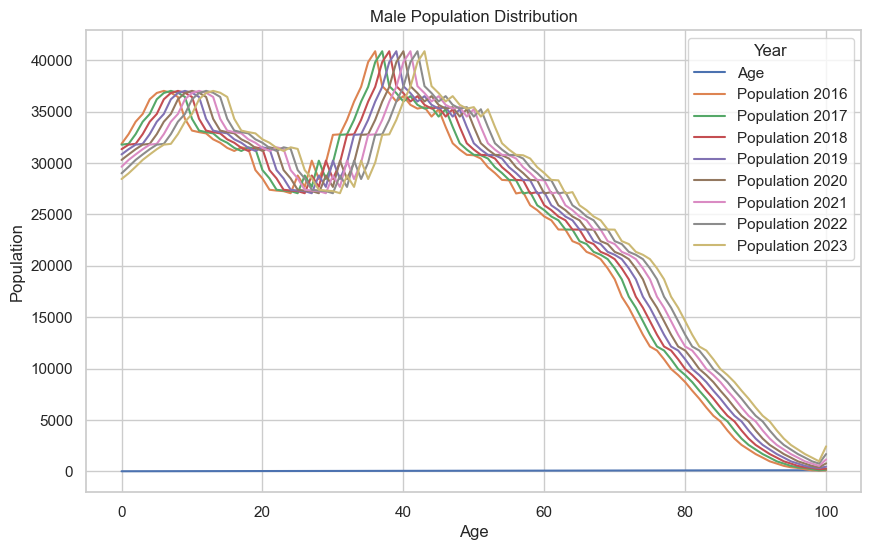

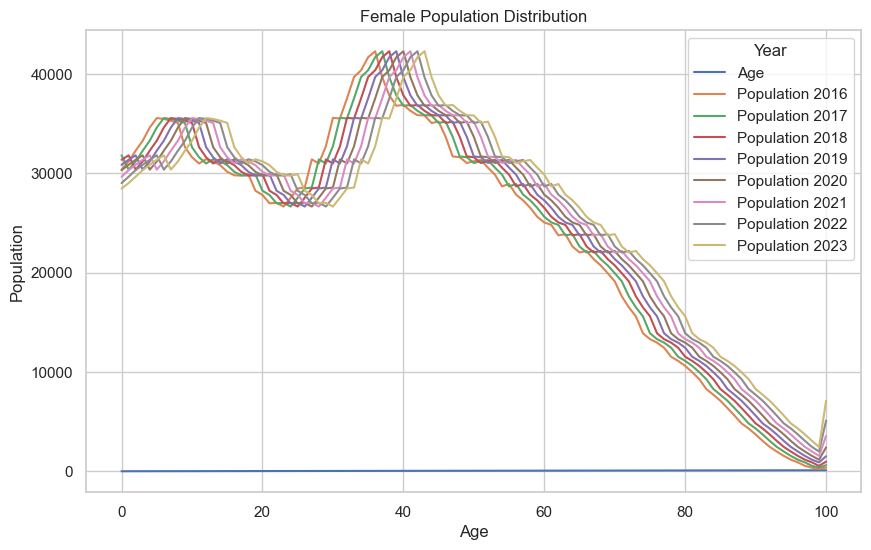

In [21]:
# Plot the data for males
plt.figure(figsize=(10, 6))
for column in male_projection.columns:  
    plt.plot(male_projection.index, male_projection[column], label=column)
plt.title('Male Population Distribution')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot the data for females
plt.figure(figsize=(10, 6))
for column in female_projection.columns:
    plt.plot(female_projection.index, female_projection[column], label=column)
plt.title('Female Population Distribution')
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend(title='Year')
plt.grid(True)
plt.show()

## Visualisation using a population pyramid

C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\2441211688.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([abs(int(tick)) for tick in ticks])  # Set positive labels


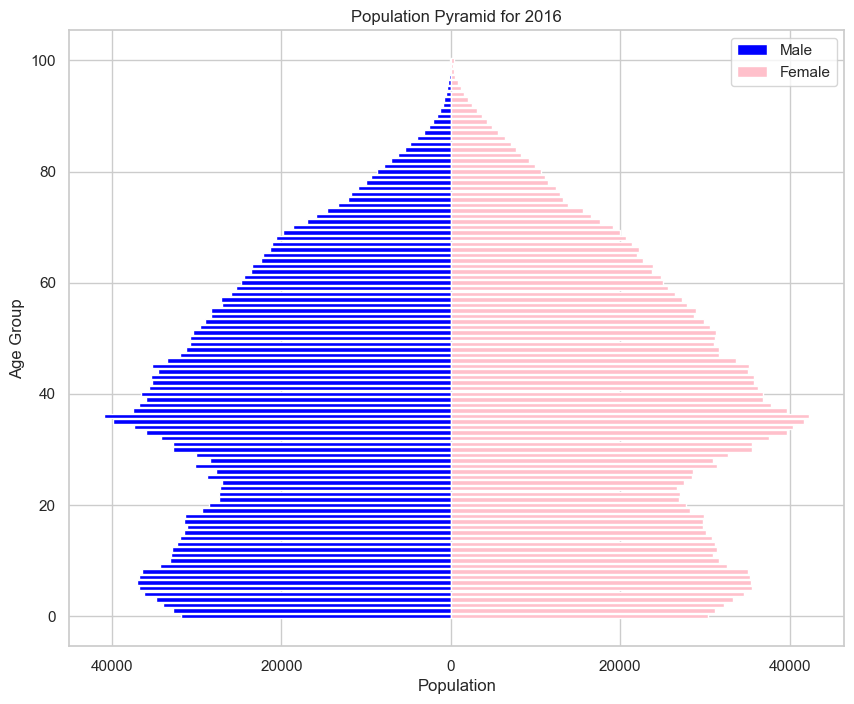

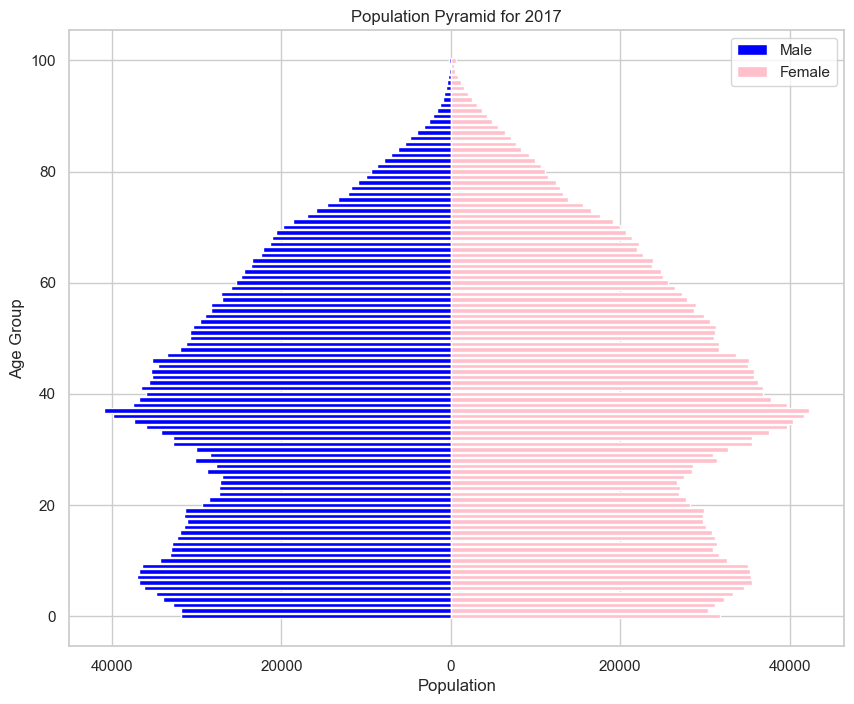

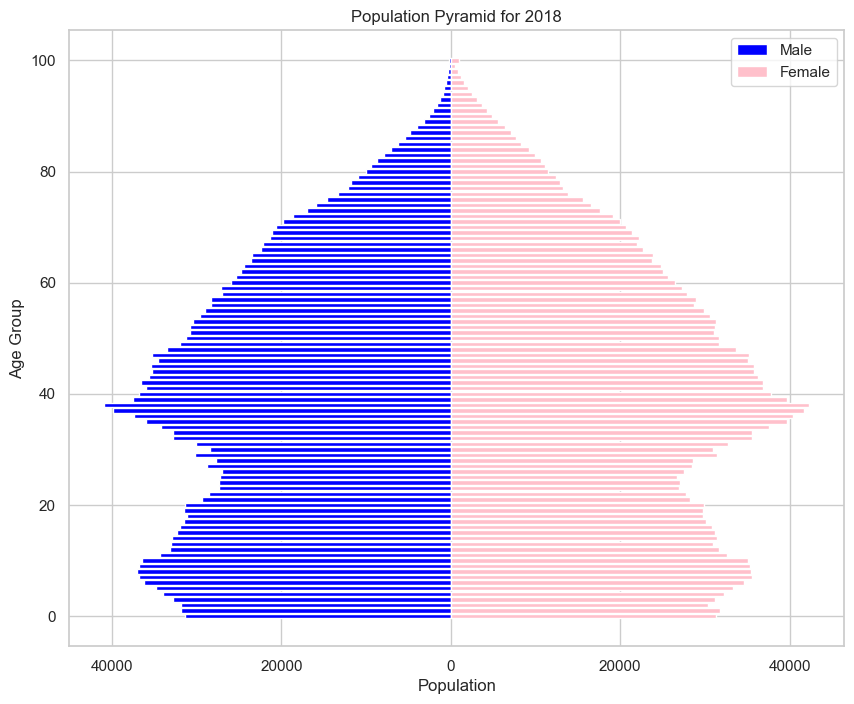

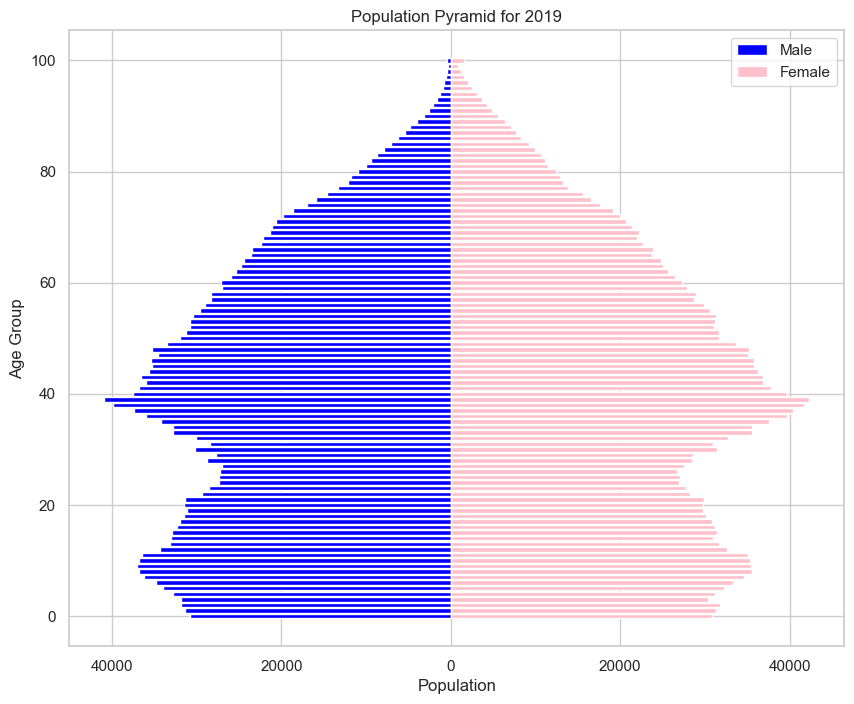

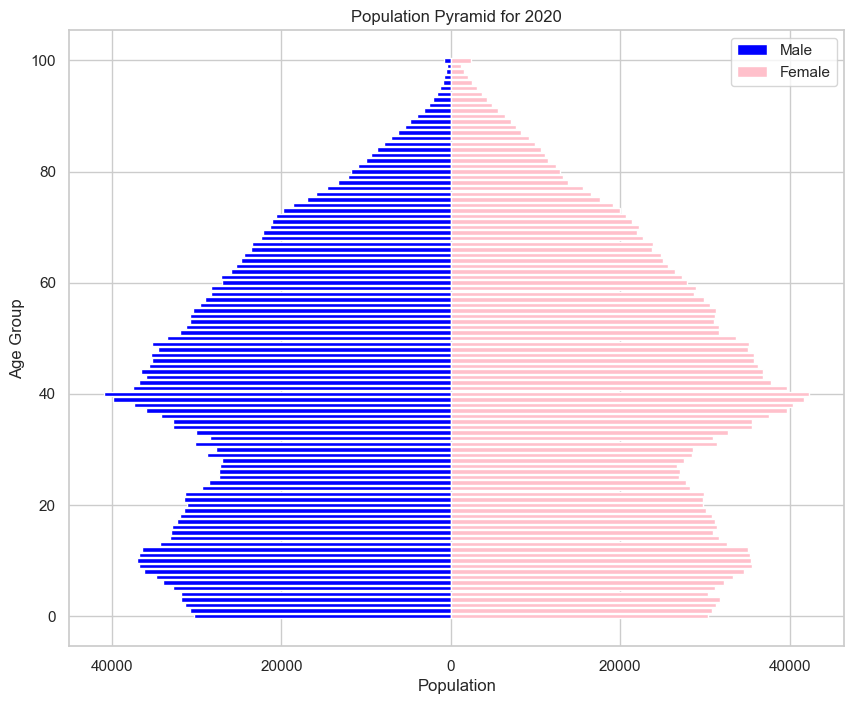

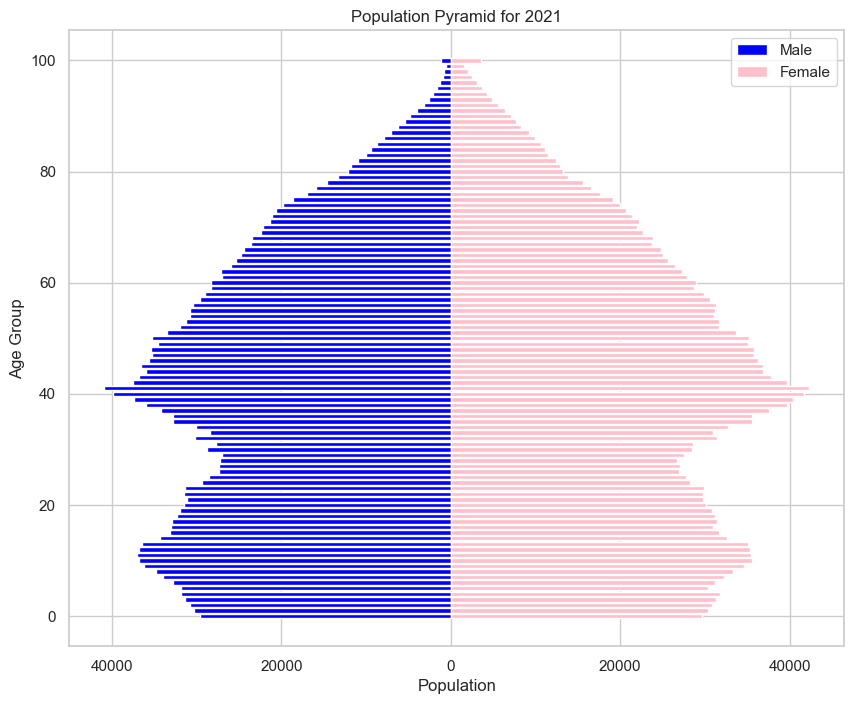

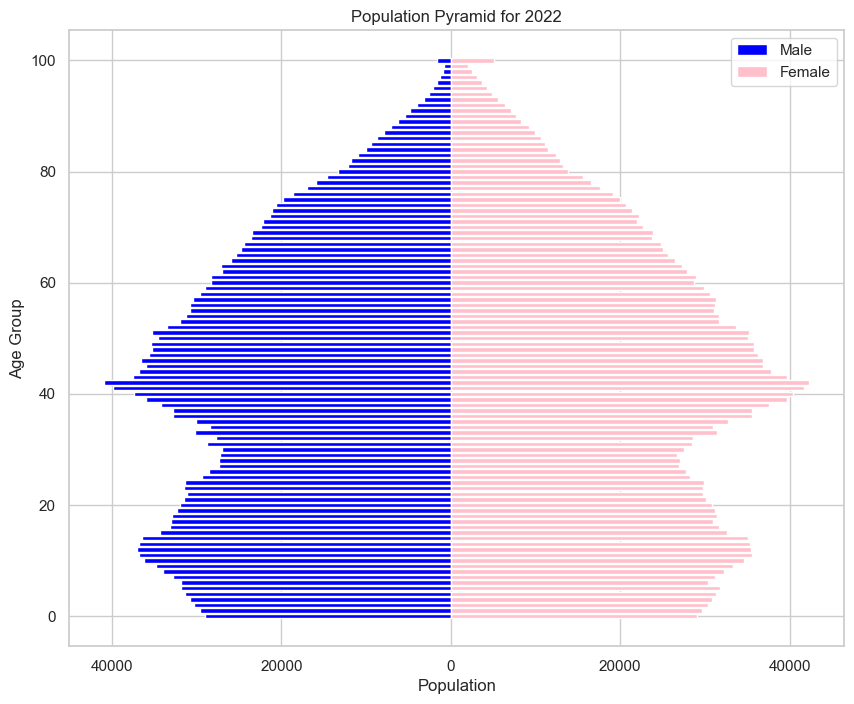

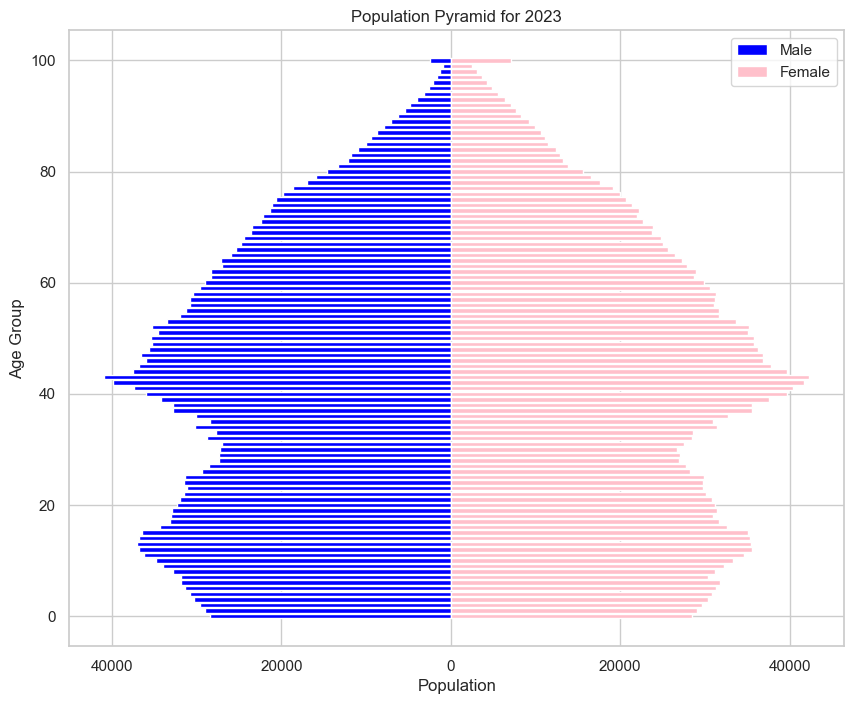

In [22]:
# Extract age groups
age_groups = male_projection.index.values

# Function to create population pyramids for a given year
def create_population_pyramid(year):
    column_name = f'Population {year}'
    # Ensure the year is in the DataFrame columns
    if column_name not in male_projection.columns or column_name not in female_projection.columns:
        raise ValueError(f"Year {year} not found in the data columns")
    
    # Extract population data for the given year
    male_population = male_projection[column_name].values
    female_population = female_projection[column_name].values
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plotting male population (negative values to show on the left)
    ax.barh(age_groups, -male_population, color='blue', label='Male')
    
    # Plotting female population (positive values to show on the right)
    ax.barh(age_groups, female_population, color='pink', label='Female')
    
    # Formatting the plot
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Group')
    ax.set_title(f'Population Pyramid for {year}')
    ax.legend(loc='upper right')
    ax.grid(True)
    
    # Customize x-axis labels to be positive
    ticks = ax.get_xticks()  # Get current x-axis ticks
    ax.set_xticklabels([abs(int(tick)) for tick in ticks])  # Set positive labels

    plt.show()

# Create population pyramids for each selected year
years = [year for year in range(2016, 2024)]  # Adjust based on your data years
for year in years:
    create_population_pyramid(year)

## Comparing the projection with actual Census 2022

In [23]:
# Load your census data CSV 
census_data_2022=pd.read_csv('./data/FY006A.20240922T130907.csv')

# Load the projected population data for both male and female for 2022
projected_male = pd.read_csv('male_population_projection_final_from_2016_to_2023.csv')
projected_female = pd.read_csv('female_population_projection_final_from_2016_to_2023.csv')

# Ensure both projected dataframes have a 'sex' column for clarity
projected_male['Sex'] = 'male'
projected_female['Sex'] = 'female'

# Concatenate male and female projected data into a single DataFrame
projected_data = pd.concat([projected_male, projected_female])

# Clean the 'Single Year of Age' column in census data
def clean_age(age_str):
    if 'Under 1' in age_str:
        return 0
    elif 'year' in age_str:
        return int(age_str.split()[0])  # Extract the number part
    return None

census_data_2022['Single Year of Age'] = census_data_2022['Single Year of Age'].apply(clean_age)

# Convert 'Age' in projected data to int for comparison
projected_data['Age'] = projected_data['Age'].astype(int)

# Standardize 'Sex' values to title for consistency
census_data_2022['Sex'] = census_data_2022['Sex'].str.title()
projected_data['Sex'] = projected_data['Sex'].str.title()

# Convert data types to match before merging
census_data_2022['Single Year of Age'] = census_data_2022['Single Year of Age'].astype(str)
projected_data['Age'] = projected_data['Age'].astype(str)

# Merge the actual census data with the projected data on 'Single Year of Age' and 'Sex' columns
merged_data = pd.merge(census_data_2022, projected_data, left_on=['Single Year of Age', 'Sex'], right_on=['Age', 'Sex'], how='inner')

# Prepare the output DataFrame with the required columns
output_data = merged_data[['Age', 'Sex', 'Population 2022', 'VALUE']]

# Rename columns for clarity
output_data.columns = ['Age', 'Sex', 'Projected Population 2022', 'Actual Population 2022']

# Save the output DataFrame
output_data.to_csv('population_comparison_2022.csv', index=False)

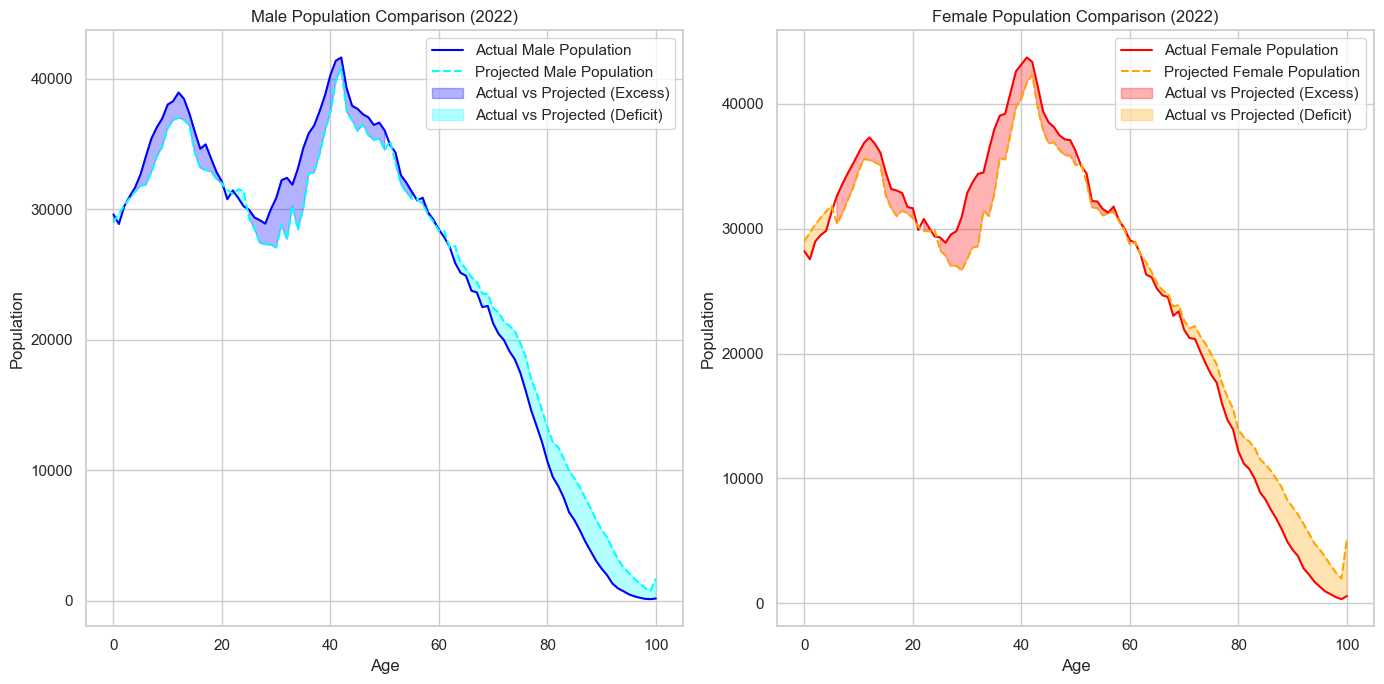

        count        mean          std     min     25%    50%     75%     max
Sex                                                                          
Female  101.0  139.376238  2275.034223 -4526.0 -1650.0   80.0  1516.0  5808.0
Male    101.0   70.871287  2036.045361 -3331.0 -1396.0  164.0  1561.0  4730.0


In [24]:
#Load the actual data for Census 2022
data_2022 = pd.read_csv('population_comparison_2022.csv')

# Extract data for 2022
male_data_2022 = data_2022[data_2022['Sex'] == 'Male']
female_data_2022 = data_2022[data_2022['Sex'] == 'Female']

# Plot comparison with transparency
plt.figure(figsize=(14, 7))

# Plot for males
plt.subplot(1, 2, 1)
plt.plot(male_data_2022['Age'], male_data_2022['Actual Population 2022'], label='Actual Male Population', color='blue')
plt.plot(male_data_2022['Age'], male_data_2022['Projected Population 2022'], label='Projected Male Population', color='cyan', linestyle='--')
plt.fill_between(male_data_2022['Age'], 
                 male_data_2022['Actual Population 2022'], 
                 male_data_2022['Projected Population 2022'], 
                 where=(male_data_2022['Actual Population 2022'] >= male_data_2022['Projected Population 2022']),
                 color='blue', alpha=0.3, label='Actual vs Projected (Excess)')
    # 'where' to handle areas where actual is above projected
plt.fill_between(male_data_2022['Age'], 
                 male_data_2022['Actual Population 2022'], 
                 male_data_2022['Projected Population 2022'], 
                 where=(male_data_2022['Actual Population 2022'] < male_data_2022['Projected Population 2022']),
                 color='cyan', alpha=0.3, label='Actual vs Projected (Deficit)')
    # 'where' to handle areas where actual is below projected
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Male Population Comparison (2022)')
plt.xticks(range(0, 101, 20))  # Set x-axis ticks from 0 to 100 with intervals of 20
plt.legend()

# Plot for females
plt.subplot(1, 2, 2)
plt.plot(female_data_2022['Age'], female_data_2022['Actual Population 2022'], label='Actual Female Population', color='red')
plt.plot(female_data_2022['Age'], female_data_2022['Projected Population 2022'], label='Projected Female Population', color='orange', linestyle='--')
plt.fill_between(female_data_2022['Age'], 
                 female_data_2022['Actual Population 2022'], 
                 female_data_2022['Projected Population 2022'], 
                 where=(female_data_2022['Actual Population 2022'] >= female_data_2022['Projected Population 2022']),
                 color='red', alpha=0.3, label='Actual vs Projected (Excess)')
    # 'where' to handle areas where actual is above projected
plt.fill_between(female_data_2022['Age'], 
                 female_data_2022['Actual Population 2022'], 
                 female_data_2022['Projected Population 2022'], 
                 where=(female_data_2022['Actual Population 2022'] < female_data_2022['Projected Population 2022']),
                 color='orange', alpha=0.3, label='Actual vs Projected (Deficit)')
    # 'where' to handle areas where actual is below projected
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Female Population Comparison (2022)')
plt.xticks(range(0, 101, 20))  # Set x-axis ticks from 0 to 100 with intervals of 20
plt.legend()

plt.tight_layout()
plt.show()

# Calculate differences
data_2022['Difference'] = data_2022['Actual Population 2022'] - data_2022['Projected Population 2022']

# Print summary statistics for the differences
summary_stats = data_2022.groupby('Sex')['Difference'].describe()
print(summary_stats)

## Considering diabetes value into the population model

In [25]:
# Read the population projection data for males and females
population_male = pd.read_csv('male_population_projection_final_from_2016_to_2023.csv')
population_female = pd.read_csv('female_population_projection_final_from_2016_to_2023.csv')

# Define prevalence and incidence rates
prevalence = {
    '0-14': 0.0019,
    '15-24': 0.0013,
    '25-34': 0.0034,
    '35-44': 0.00106,
    '45-54': 0.0291,
    '55-64': 0.0650,
    '65-69': 0.1075,
    '70+': 0.1210
}

incidence = {
    '0-14': 0.0005,
    '15-24': 0.0008,
    '25-34': 0.0017,
    '35-44': 0.0035,
    '45-54': 0.0070,
    '55-64': 0.0126,
    '65-69': 0.0208,
    '70+': 0.0186
}

# Function to map age to prevalence and incidence categories
def map_age_to_category(age):
    if age <= 14:
        return '0-14'
    elif age <= 24:
        return '15-24'
    elif age <= 34:
        return '25-34'
    elif age <= 44:
        return '35-44'
    elif age <= 54:
        return '45-54'
    elif age <= 64:
        return '55-64'
    elif age <= 69:
        return '65-69'
    else:
        return '70+'


# Add 'Category' column based on the age range for both male and female datasets
population_male['Category'] = population_male.index.map(map_age_to_category)
population_female['Category'] = population_female.index.map(map_age_to_category)

# Function to calculate diabetes prevalence and incidence
def calculate_diabetes_projection(data):
    # Calculate diabetes population for 2016 using prevalence
    data['Diabetes 2016'] = (data['Population 2016'] * data['Category'].map(prevalence)).round()

    # Initialize columns for the years 2017 to 2023
    for year in range(2017, 2024):
        prev_year = year - 1
        incidence_col = f'Incidence {year}'
        prev_diabetes_col = f'Diabetes {prev_year}'
        new_diabetes_col = f'Diabetes {year}'
        
        # Calculate new diabetes cases based on incidence
        data[incidence_col] = (data[f'Population {year}'] * data['Category'].map(incidence)).round()
        # Update total diabetes population for the current year
        data[new_diabetes_col] = (data[prev_diabetes_col] + data[incidence_col]).round()

    # Drop the 'Category' column as it is not needed in the final output
    data.drop(columns=['Category'], inplace=True)
    
    # Reorder columns to match the desired output format
    columns_order = ['Age']
    for year in range(2016, 2024):
        columns_order.append(f'Population {year}')
        columns_order.append(f'Diabetes {year}')
    
    # Ensure the final columns are in the correct order
    data = data.reset_index().reindex(columns=columns_order)

    return data

# Apply the diabetes projection function to both male and female populations
population_male_diabetes = calculate_diabetes_projection(population_male)
population_female_diabetes = calculate_diabetes_projection(population_female)

# Reset index and assign sequential age numbers for males
population_male_diabetes.index.name = 'Age'
population_male_diabetes.reset_index(drop=True, inplace=True)

# Reset index and assign sequential age numbers for females
population_female_diabetes.index.name = 'Age'
population_female_diabetes.reset_index(drop=True, inplace=True)

# Save the projections to CSV files
population_male_diabetes.to_csv('male_diabetes_projection_data_from_2016_to_2023.csv', index=False)
population_female_diabetes.to_csv('female_diabetes_projection_data_from_2016_to_2023.csv', index=False)

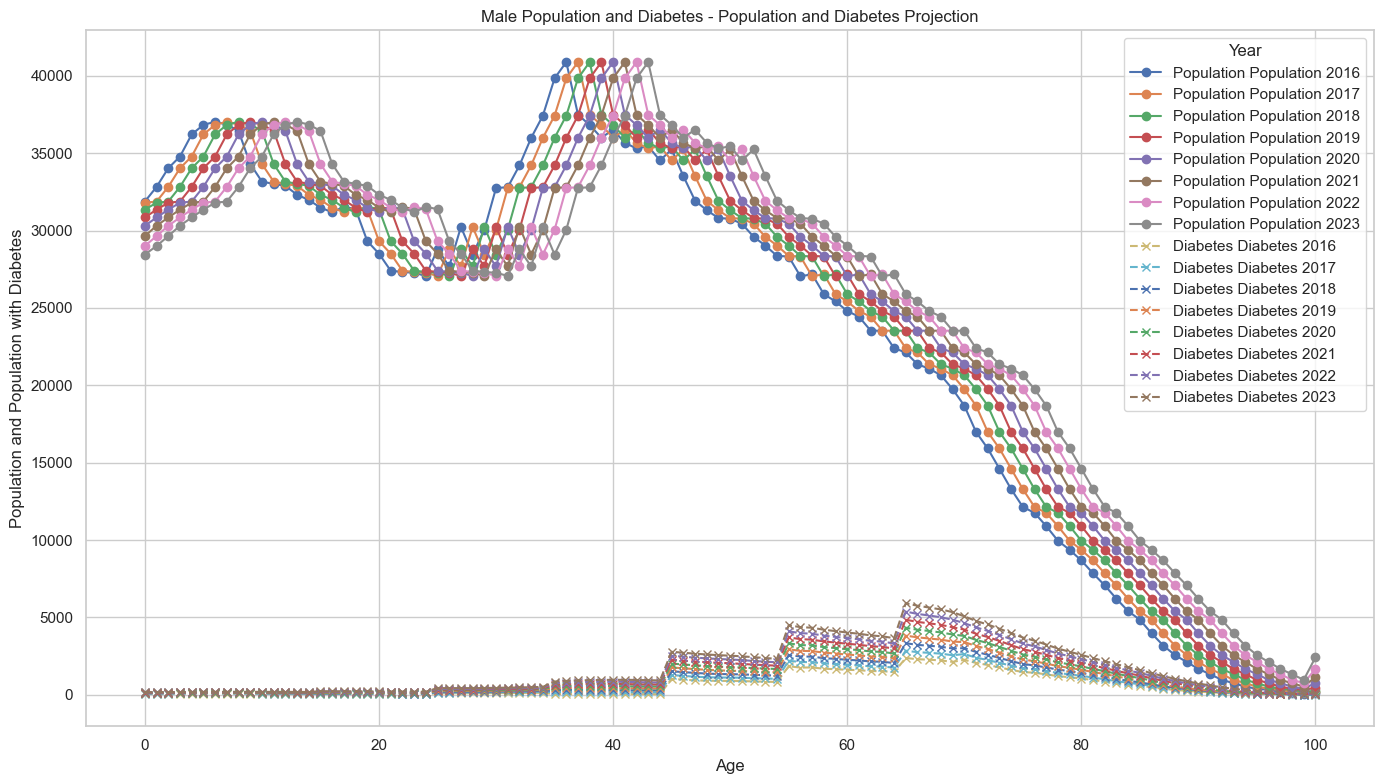

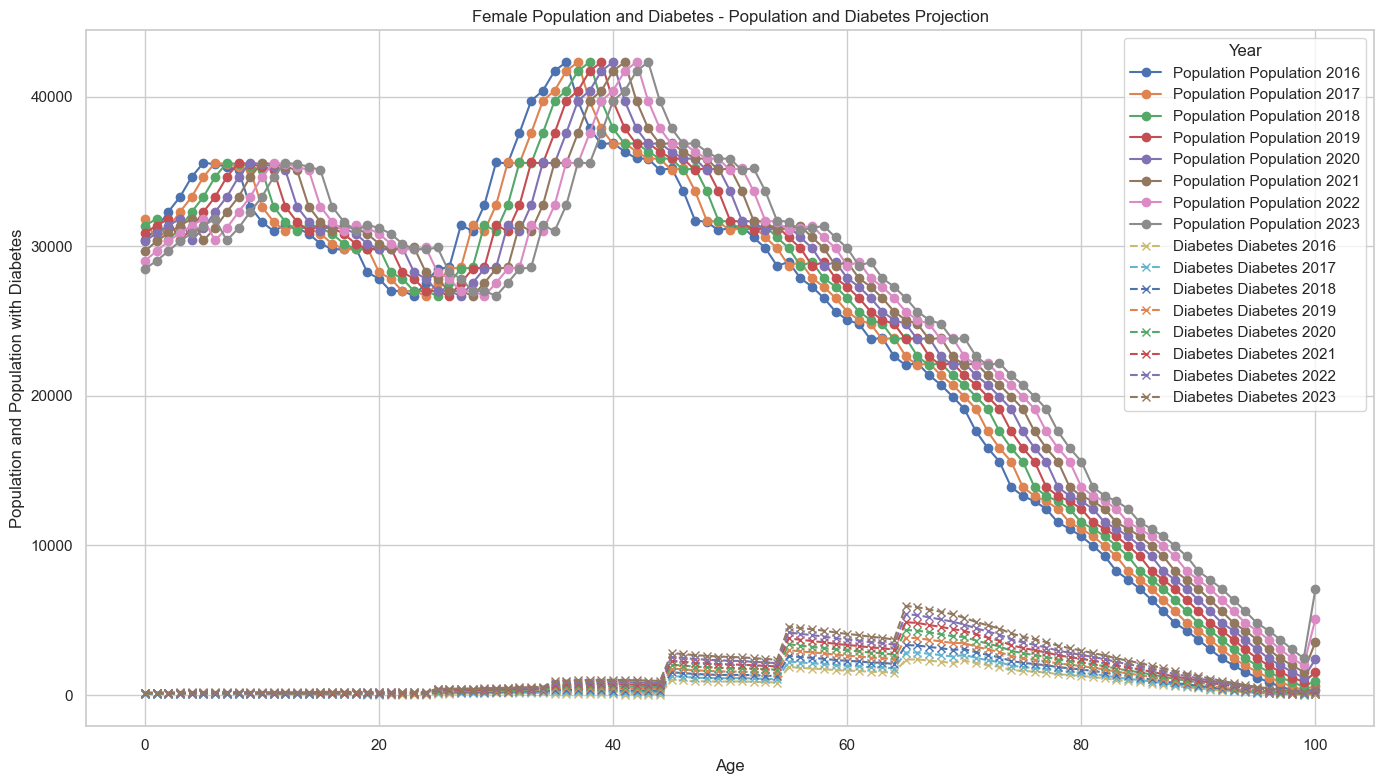

In [26]:
# Function to plot both population and diabetes projection on the same graph
def plot_population_and_diabetes_projection(data, title):
    # Define the column names for population and diabetes projections
    population_years = [f'Population {year}' for year in range(2016, 2024)]
    diabetes_years = [f'Diabetes {year}' for year in range(2016, 2024)]
    
    # Plot both population and diabetes data
    plt.figure(figsize=(14, 8))

    # Plot population data
    for year in population_years:
        plt.plot(data['Age'], data[year], label=f'Population {year}', linestyle='-', marker='o')

    # Plot diabetes data
    for year in diabetes_years:
        plt.plot(data['Age'], data[year], label=f'Diabetes {year}', linestyle='--', marker='x')

    plt.title(f'{title} - Population and Diabetes Projection')
    plt.xlabel('Age')
    plt.ylabel('Population and Population with Diabetes')
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming 'population_male_diabetes' and 'population_female_diabetes' are the DataFrames with diabetes data.
# Plot for male population and diabetes
plot_population_and_diabetes_projection(population_male_diabetes, 'Male Population and Diabetes')

# Plot for female population and diabetes
plot_population_and_diabetes_projection(population_female_diabetes, 'Female Population and Diabetes')

## Estimating diabetes prevalence for each age

In [27]:
# Load male and female diabetes data
male_data = pd.read_csv('male_diabetes_projection_data_from_2016_to_2023.csv')
female_data = pd.read_csv('female_diabetes_projection_data_from_2016_to_2023.csv')

#Combine the datasets
combined_data = pd.concat([male_data, female_data], ignore_index=True)

# Initialize an empty DataFrame for prevalence results
prevalence_data = pd.DataFrame()

# Loop through the years from 2016 to 2023
for year in range(2016, 2024):
    population_col = f'Population {year}'
    diabetes_col = f'Diabetes {year}'
    
    # Calculate diabetes prevalence for the current year
    prevalence_data[year] = (combined_data[diabetes_col] / combined_data[population_col]) * 100

# Add age column to the prevalence data
prevalence_data['Age'] = combined_data['Age']

# Reshape the data to a long format for plotting
long_prevalence_data = prevalence_data.melt(id_vars='Age', 
                                             var_name='Year', 
                                             value_name='Diabetes Prevalence')

# Display the prevalence data
print(long_prevalence_data[['Age', 'Year', 'Diabetes Prevalence']])

      Age  Year  Diabetes Prevalence
0       0  2016             0.191367
1       1  2016             0.188886
2       2  2016             0.191002
3       3  2016             0.189737
4       4  2016             0.190529
...   ...   ...                  ...
1611   96  2023            10.408922
1612   97  2023             9.257760
1613   98  2023             8.546169
1614   99  2023             8.075041
1615  100  2023             6.200676

[1616 rows x 3 columns]


## Estimating diabetes prevalence (%)

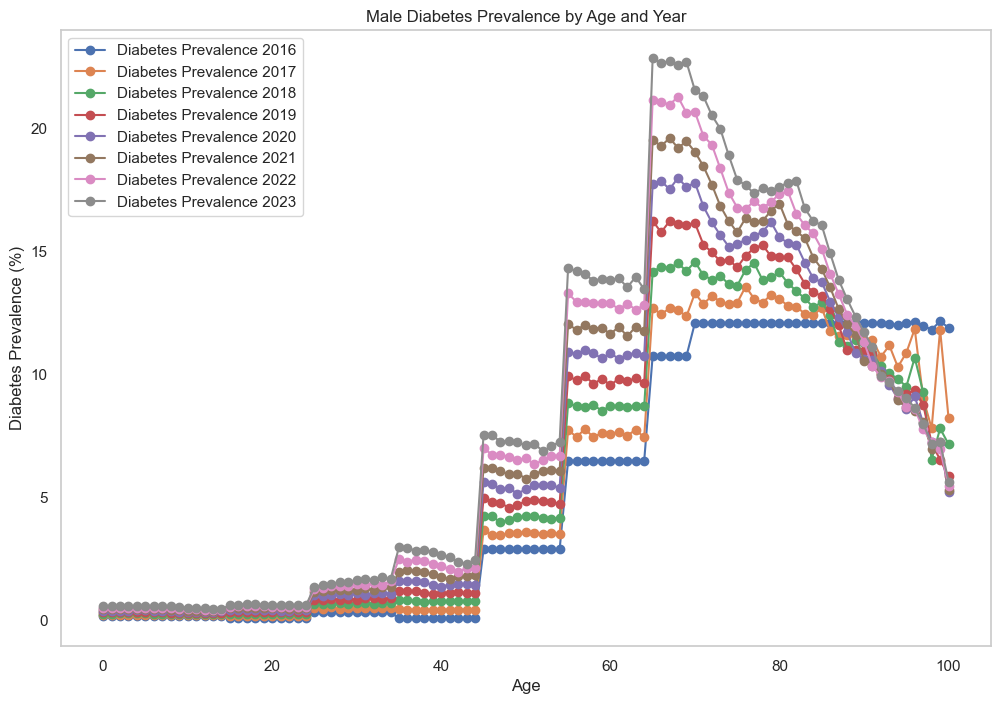

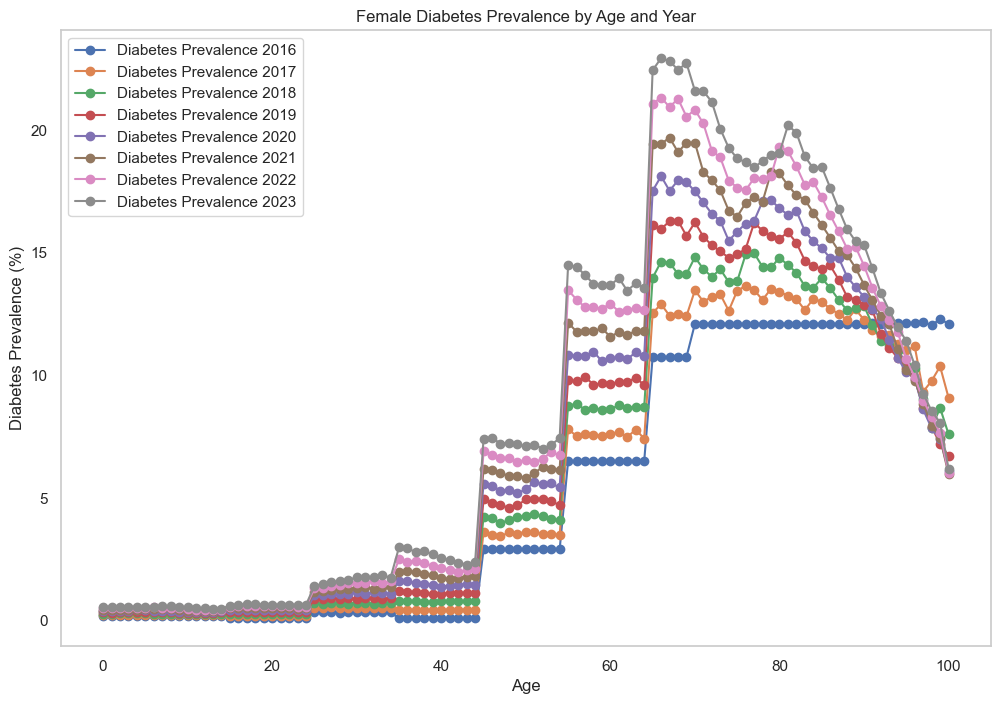

In [28]:
# Load male and female diabetes data
male_data = pd.read_csv('male_diabetes_projection_data_from_2016_to_2023.csv')
female_data = pd.read_csv('female_diabetes_projection_data_from_2016_to_2023.csv')

# Initialize empty DataFrames for prevalence results
male_prevalence_data = pd.DataFrame()
female_prevalence_data = pd.DataFrame()

# Loop through the years from 2016 to 2023 for males
for year in range(2016, 2024):
    population_col = f'Population {year}'
    diabetes_col = f'Diabetes {year}'
    
    # Calculate diabetes prevalence for males
    male_prevalence_data[year] = (male_data[diabetes_col] / male_data[population_col]) * 100

# Add age column to the male prevalence data
male_prevalence_data['Age'] = male_data['Age']

# Reshape the male data to a long format for plotting
long_male_prevalence_data = male_prevalence_data.melt(id_vars='Age', 
                                                       var_name='Year', 
                                                       value_name='Diabetes Prevalence')

# Loop through the years from 2016 to 2023 for females
for year in range(2016, 2024):
    population_col = f'Population {year}'
    diabetes_col = f'Diabetes {year}'
    
    # Calculate diabetes prevalence for females
    female_prevalence_data[year] = (female_data[diabetes_col] / female_data[population_col]) * 100

# Add age column to the female prevalence data
female_prevalence_data['Age'] = female_data['Age']

# Reshape the female data to a long format for plotting
long_female_prevalence_data = female_prevalence_data.melt(id_vars='Age', 
                                                           var_name='Year', 
                                                           value_name='Diabetes Prevalence')

# Save the prevalence data to CSV files
long_male_prevalence_data.to_csv('male_diabetes_prevalence_2016_to_2023.csv', index=False)
long_female_prevalence_data.to_csv('female_diabetes_prevalence_2016_to_2023.csv', index=False)

# Plotting for males
plt.figure(figsize=(12, 8))
for year in long_male_prevalence_data['Year'].unique():
    year_data = long_male_prevalence_data[long_male_prevalence_data['Year'] == year]
    plt.plot(year_data['Age'], year_data['Diabetes Prevalence'], marker='o', label=f'Diabetes Prevalence {year}')

plt.title('Male Diabetes Prevalence by Age and Year')
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid()
plt.legend()
plt.show()

# Plotting for females
plt.figure(figsize=(12, 8))
for year in long_female_prevalence_data['Year'].unique():
    year_data = long_female_prevalence_data[long_female_prevalence_data['Year'] == year]
    plt.plot(year_data['Age'], year_data['Diabetes Prevalence'], marker='o', label=f'Diabetes Prevalence {year}')

plt.title('Female Diabetes Prevalence by Age and Year')
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid()
plt.legend()
plt.show()

## Parametric study and sensitivity analysis

In [29]:
# Load male and female diabetes prevalence data
long_male_prevalence_data = pd.read_csv('male_diabetes_prevalence_2016_to_2023.csv')
long_female_prevalence_data = pd.read_csv('female_diabetes_prevalence_2016_to_2023.csv')

# Initialize lists to hold results
male_results = []
female_results = []

# List of unique years
male_years = long_male_prevalence_data['Year'].unique()
female_years = long_female_prevalence_data['Year'].unique()

# Process male data
for year in male_years:
    year_data = long_male_prevalence_data[long_male_prevalence_data['Year'] == year]
    
    # Calculate upper and lower bounds (5% margin)
    year_data['Prevalence_Lower'] = year_data['Diabetes Prevalence'] * 0.95
    year_data['Prevalence_Upper'] = year_data['Diabetes Prevalence'] * 1.05

    # Calculate error margins
    year_data['Error_Margin'] = year_data['Prevalence_Upper'] - year_data['Prevalence_Lower']
    
    # Store results for males
    male_results.append(year_data[['Age', 'Diabetes Prevalence', 'Prevalence_Upper','Prevalence_Lower','Year', 'Error_Margin']])

# Process female data
for year in female_years:
    year_data = long_female_prevalence_data[long_female_prevalence_data['Year'] == year]
    
    # Calculate upper and lower bounds (5% margin)
    year_data['Prevalence_Lower'] = year_data['Diabetes Prevalence'] * 0.95
    year_data['Prevalence_Upper'] = year_data['Diabetes Prevalence'] * 1.05

    # Calculate error margins
    year_data['Error_Margin'] = year_data['Prevalence_Upper'] - year_data['Prevalence_Lower']
    
    # Store results for females
    female_results.append(year_data[['Age', 'Diabetes Prevalence', 'Prevalence_Upper','Prevalence_Lower','Year', 'Error_Margin']])

# Combine all results into separate DataFrames
final_male_results = pd.concat(male_results)
final_female_results = pd.concat(female_results)

# Save the final results to new CSV files
final_male_results.to_csv('male_diabetes_prevalence_with_error_margins.csv', index=False)
final_female_results.to_csv('female_diabetes_prevalence_with_error_margins.csv', index=False)

# Display the results
print("Final male Results:")
print(final_male_results)
print("\nFinal female Results:")
print(final_female_results)

Final male Results:
     Age  Diabetes Prevalence  Prevalence_Upper  Prevalence_Lower  Year  \
0      0             0.191367          0.200935          0.181798  2016   
1      1             0.188886          0.198330          0.179442  2016   
2      2             0.191002          0.200552          0.181452  2016   
3      3             0.189737          0.199224          0.180250  2016   
4      4             0.190529          0.200055          0.181002  2016   
..   ...                  ...               ...               ...   ...   
803   96             8.644308          9.076523          8.212093  2023   
804   97             8.009564          8.410042          7.609085  2023   
805   98             7.175227          7.533988          6.816465  2023   
806   99             7.246377          7.608696          6.884058  2023   
807  100             5.654148          5.936855          5.371440  2023   

     Error_Margin  
0        0.019137  
1        0.018889  
2        0.019100  

C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\3267983479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Prevalence_Lower'] = year_data['Diabetes Prevalence'] * 0.95
C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\3267983479.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Prevalence_Upper'] = year_data['Diabetes Prevalence'] * 1.05
C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\3267983479.py:22: SettingWithCopyWarning: 
A value is 

## Plotting diabetes prevalence with error margins by age

C:\Users\Ananthakrishnan S\AppData\Local\Temp\ipykernel_31172\4024337094.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


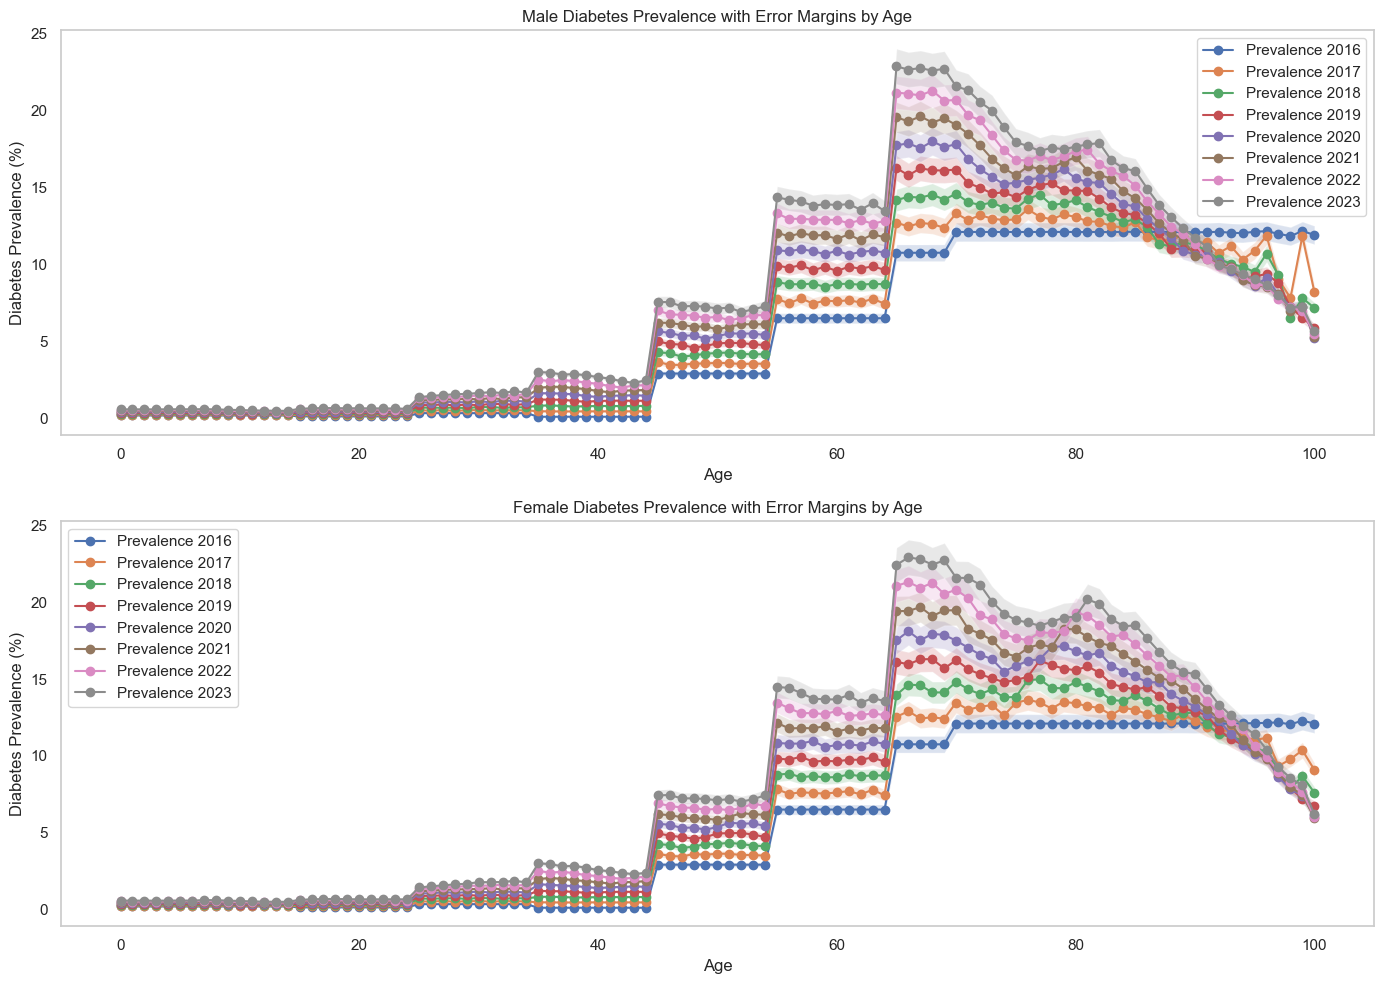

In [30]:
# Set up the figure for plotting
plt.figure(figsize=(14, 10))

# Plotting for males
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
for year in final_male_results['Year'].unique():
    year_data = final_male_results[final_male_results['Year'] == year]
    plt.plot(year_data['Age'], year_data['Diabetes Prevalence'], marker='o', label=f'Prevalence {year}')
    plt.fill_between(year_data['Age'], 
                     year_data['Prevalence_Lower'], 
                     year_data['Prevalence_Upper'], 
                     alpha=0.2)

plt.title('Male Diabetes Prevalence with Error Margins by Age')
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid()
plt.legend()
plt.tight_layout()

# Plotting for females
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
for year in final_female_results['Year'].unique():
    year_data = final_female_results[final_female_results['Year'] == year]
    plt.plot(year_data['Age'], year_data['Diabetes Prevalence'], marker='o', label=f'Prevalence {year}')
    plt.fill_between(year_data['Age'], 
                     year_data['Prevalence_Lower'], 
                     year_data['Prevalence_Upper'], 
                     alpha=0.2)

plt.title('Female Diabetes Prevalence with Error Margins by Age')
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()